In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt

In [2]:
df=pdr.get_data_yahoo("TSLA")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666
2017-10-23,23.330000,22.416668,23.325333,22.468000,86209500.0,22.468000
2017-10-24,22.853333,22.410667,22.586666,22.489332,67375500.0,22.489332
2017-10-25,22.500000,21.570667,22.446667,21.722668,128911500.0,21.722668
...,...,...,...,...,...,...
2022-10-13,222.990005,206.220001,208.300003,221.720001,91483000.0,221.720001
2022-10-14,226.259995,204.160004,224.009995,204.990005,93898700.0,204.990005
2022-10-17,221.860001,209.449997,210.039993,219.350006,79428800.0,219.350006


In [ ]:
# Simple Moving Average
# To get the smothening of the graph we do it

<AxesSubplot:xlabel='Date'>

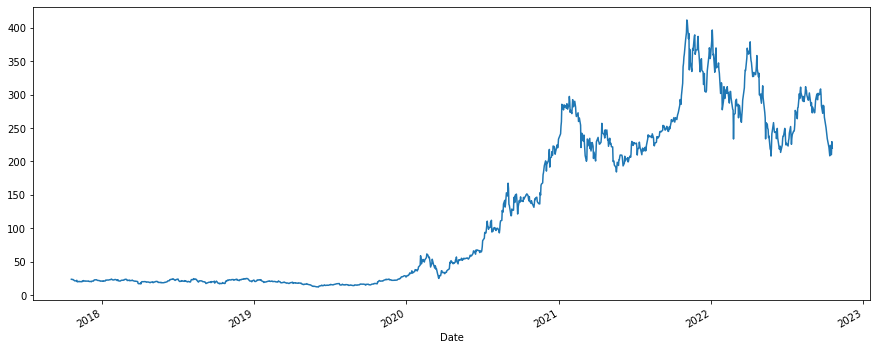

In [3]:
df["Open"].plot(figsize=(15,6))

In [11]:
df["Open:10 days rolling"]=df["Open"].rolling(window=10,min_periods=1).mean()
df["Open:30 days rolling"]=df["Open"].rolling(window=30,min_periods=1).mean()
df["Open:50 days rolling"]=df["Open"].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

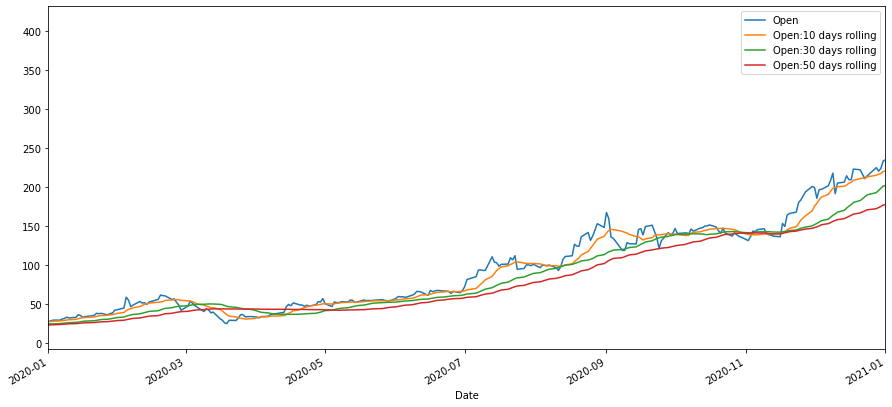

In [12]:
df[["Open","Open:10 days rolling","Open:30 days rolling","Open:50 days rolling"]].plot(xlim=["2020-01-01","2021-01-01"],figsize=(15,7))

<AxesSubplot:xlabel='Date'>

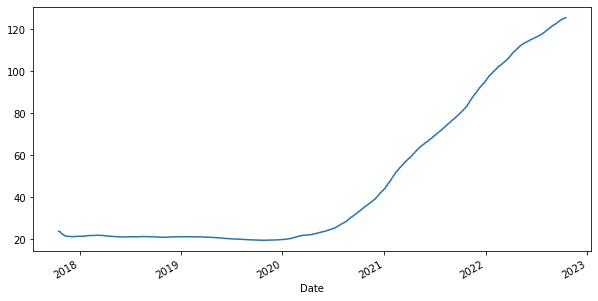

In [14]:
# Cmulative Moving Average 
# Expanding
df["Open"].expanding().mean().plot(figsize=(10,5))

#### EMA :- Exponential Moving Average
#### Formula= ( (close-Prev EMA) *multiplier + Prev EMA)   Multiplier=1/(EMA+1)

#### EWMA :- Exponential Weighted Moving Average
* EWMA= a*x(t)+(1-a) EMWA(t-1)

In [17]:
# EMA
# Lets take smoothing Factor - 0.1
df["EMA_0.1"]=df["Open"].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

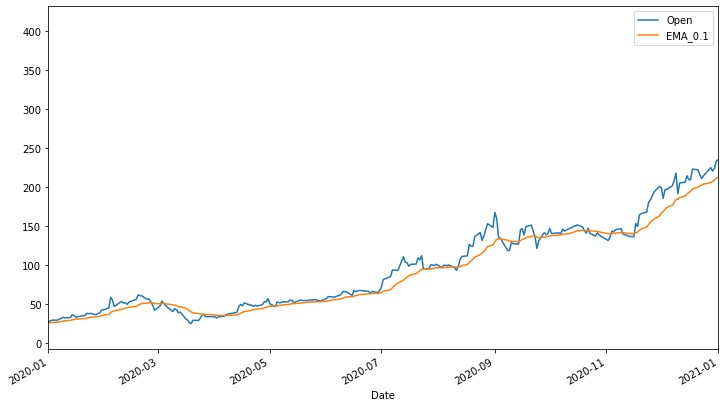

In [19]:
df[["Open","EMA_0.1"]].plot(xlim=["2020-01-01","2021-01-01"],figsize=(12,7))

<AxesSubplot:xlabel='Date'>

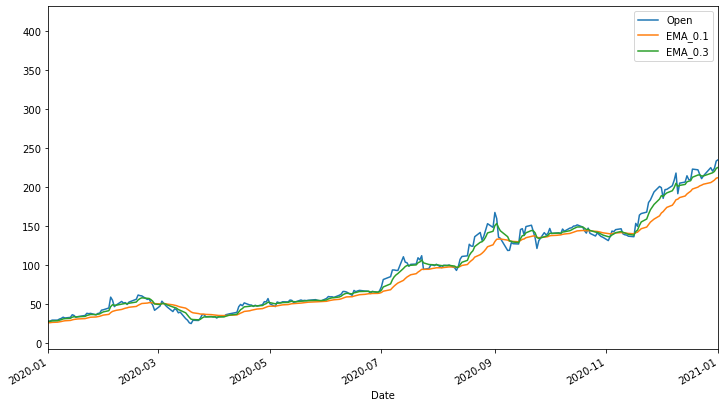

In [21]:
df["EMA_0.3"]=df["Open"].ewm(alpha=0.3,adjust=False).mean()
df[["Open","EMA_0.1","EMA_0.3"]].plot(xlim=["2020-01-01","2021-01-01"],figsize=(12,7))

<AxesSubplot:xlabel='Date'>

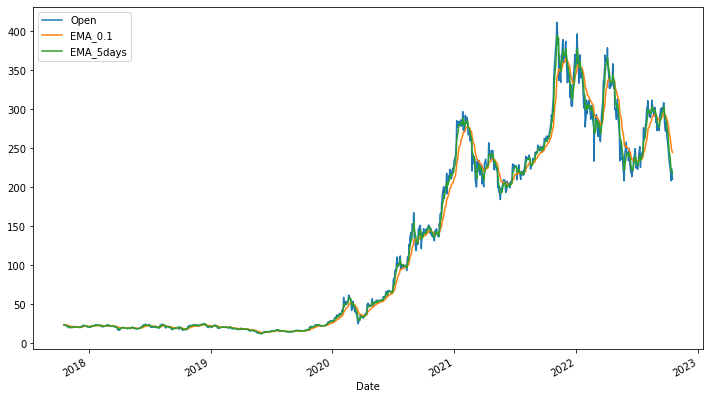

In [25]:
df["EMA_5days"]=df["Open"].ewm(span=5).mean()
df[["Open","EMA_0.1","EMA_5days"]].plot(figsize=(12,7))